In [185]:
import pandas as pd
from distutils.version import StrictVersion
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns

from pandasql import sqldf
dfsql = lambda q: sqldf(q, globals())

pd.set_option('display.max_columns', 500)
plt.rcParams['figure.figsize'] = [15,3]

In [186]:
df_raw = pd.read_parquet('./parquet_conversion/deduped.lateral.parquet', engine='pyarrow')

In [187]:
df_raw['date'] = df_raw.gameCreation.dt.date

In [188]:
def extractShortVersion(x):
    split_array = x.split('.')
    major = split_array[0]
    minor = split_array[1]
    if len(minor) < 2:
        minor = "0{num}".format(num=minor)
    return float("{major}.{minor}".format(major=major, minor=minor))

df_raw['shortVersion'] = df_raw.gameVersion.apply(extractShortVersion)
# df['ver'] = df['shortVersion'].apply(StrictVersion)

In [189]:
df_raw['win'] = df_raw.win.apply(lambda x: 1 if x == 'Win' else 0)

In [190]:
df_raw.groupby(['player.summonerId', 'player.summonerName'], sort=False, as_index=False).count().sort_values(by='gameCreation', ascending=False).head(n=20)

,player.summonerId,player.summonerName,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,platformId,queueId,seasonId,participantId,player.accountId,player.currentAccountId,player.currentPlatformId,player.matchHistoryUri,player.platformId,player.profileIcon,championId,highestAchievedSeasonTier,spell1Id,spell2Id,stats.assists,stats.champLevel,stats.combatPlayerScore,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.damageSelfMitigated,stats.deaths,stats.doubleKills,stats.firstBloodAssist,stats.firstBloodKill,stats.firstInhibitorAssist,stats.firstInhibitorKill,stats.firstTowerAssist,stats.firstTowerKill,stats.goldEarned,stats.goldSpent,stats.inhibitorKills,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.killingSprees,stats.kills,stats.largestCriticalStrike,stats.largestKillingSpree,stats.largestMultiKill,stats.longestTimeSpentLiving,stats.magicDamageDealt,stats.magicDamageDealtToChampions,stats.magicalDamageTaken,stats.neutralMinionsKilled,stats.neutralMinionsKilledEnemyJungle,stats.neutralMinionsKilledTeamJungle,stats.objectivePlayerScore,stats.participantId,stats.pentaKills,stats.perk0,stats.perk0Var1,stats.perk0Var2,stats.perk0Var3,stats.perk1,stats.perk1Var1,stats.perk1Var2,stats.perk1Var3,stats.perk2,stats.perk2Var1,stats.perk2Var2,stats.perk2Var3,stats.perk3,stats.perk3Var1,stats.perk3Var2,stats.perk3Var3,stats.perk4,stats.perk4Var1,stats.perk4Var2,stats.perk4Var3,stats.perk5,stats.perk5Var1,stats.perk5Var2,stats.perk5Var3,stats.perkPrimaryStyle,stats.perkSubStyle,stats.physicalDamageDealt,stats.physicalDamageDealtToChampions,stats.physicalDamageTaken,stats.playerScore0,stats.playerScore1,stats.playerScore2,stats.playerScore3,stats.playerScore4,stats.playerScore5,stats.playerScore6,stats.playerScore7,stats.playerScore8,stats.playerScore9,stats.quadraKills,stats.sightWardsBoughtInGame,stats.timeCCingOthers,stats.totalDamageDealt,stats.totalDamageDealtToChampions,stats.totalDamageTaken,stats.totalHeal,stats.totalMinionsKilled,stats.totalPlayerScore,stats.totalScoreRank,stats.totalTimeCrowdControlDealt,stats.totalUnitsHealed,stats.tripleKills,stats.trueDamageDealt,stats.trueDamageDealtToChampions,stats.trueDamageTaken,stats.turretKills,stats.unrealKills,stats.visionScore,stats.visionWardsBoughtInGame,stats.wardsKilled,stats.wardsPlaced,stats.win,teamId,timeline.creepsPerMinDeltas.0-10,timeline.csDiffPerMinDeltas.0-10,timeline.damageTakenDiffPerMinDeltas.0-10,timeline.damageTakenPerMinDeltas.0-10,timeline.goldPerMinDeltas.0-10,timeline.lane,timeline.participantId,timeline.role,timeline.xpDiffPerMinDeltas.0-10,timeline.xpPerMinDeltas.0-10,baronKills,dominionVictoryScore,dragonKills,firstBaron,firstBlood,firstDragon,firstInhibitor,firstRiftHerald,firstTower,inhibitorKills,riftHeraldKills,towerKills,vilemawKills,win,timeline.creepsPerMinDeltas.10-20,timeline.csDiffPerMinDeltas.10-20,timeline.damageTakenDiffPerMinDeltas.10-20,timeline.damageTakenPerMinDeltas.10-20,timeline.goldPerMinDeltas.10-20,timeline.xpDiffPerMinDeltas.10-20,timeline.xpPerMinDeltas.10-20,timeline.creepsPerMinDeltas.20-30,timeline.creepsPerMinDeltas.30-end,timeline.csDiffPerMinDeltas.20-30,timeline.csDiffPerMinDeltas.30-end,timeline.damageTakenDiffPerMinDeltas.20-30,timeline.damageTakenDiffPerMinDeltas.30-end,timeline.damageTakenPerMinDeltas.20-30,timeline.damageTakenPerMinDeltas.30-end,timeline.goldPerMinDeltas.20-30,timeline.goldPerMinDeltas.30-end,timeline.xpDiffPerMinDeltas.20-30,timeline.xpDiffPerMinDeltas.30-end,timeline.xpPerMinDeltas.20-30,timeline.xpPerMinDeltas.30-end,countnumber,date,shortVersion
138,73012371.0,jokokoloko,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,597,598,478,478,590,590,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,480,480,598,598,598,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,598,598,598,598,598

In [204]:
df = df_raw[
    (
        (df_raw['player.summonerId'] == 73012371.0) |
        (df_raw['player.summonerId'] == 23455234.0) |
        (df_raw['player.summonerId'] == 61079726.0) |
        (df_raw['player.summonerId'] == 23037187.0) |
        (df_raw['player.summonerId'] == 64983167.0) |
        
        (df_raw['player.summonerId'] == 22928658.0) |
        (df_raw['player.summonerId'] == 64811789.0) |
        (df_raw['player.summonerId'] == 21411852.0) |
        (df_raw['player.summonerId'] == 64739124.0) |
        (df_raw['player.summonerId'] == 23924232.0) |
        (df_raw['player.summonerId'] == 24132946.0) |
        (df_raw['player.summonerId'] == 64800284.0)
    ) &
    (df_raw['shortVersion'] == 8.19) &
    (
        (df_raw['queueId'] == 400) |
        (df_raw['queueId'] == 420) |
        (df_raw['queueId'] == 440)
    )
]

In [205]:
df.head()

,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,platformId,queueId,seasonId,participantId,player.accountId,player.currentAccountId,player.currentPlatformId,player.matchHistoryUri,player.platformId,player.profileIcon,player.summonerId,player.summonerName,championId,highestAchievedSeasonTier,spell1Id,spell2Id,stats.assists,stats.champLevel,stats.combatPlayerScore,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.damageSelfMitigated,stats.deaths,stats.doubleKills,stats.firstBloodAssist,stats.firstBloodKill,stats.firstInhibitorAssist,stats.firstInhibitorKill,stats.firstTowerAssist,stats.firstTowerKill,stats.goldEarned,stats.goldSpent,stats.inhibitorKills,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.killingSprees,stats.kills,stats.largestCriticalStrike,stats.largestKillingSpree,stats.largestMultiKill,stats.longestTimeSpentLiving,stats.magicDamageDealt,stats.magicDamageDealtToChampions,stats.magicalDamageTaken,stats.neutralMinionsKilled,stats.neutralMinionsKilledEnemyJungle,stats.neutralMinionsKilledTeamJungle,stats.objectivePlayerScore,stats.participantId,stats.pentaKills,stats.perk0,stats.perk0Var1,stats.perk0Var2,stats.perk0Var3,stats.perk1,stats.perk1Var1,stats.perk1Var2,stats.perk1Var3,stats.perk2,stats.perk2Var1,stats.perk2Var2,stats.perk2Var3,stats.perk3,stats.perk3Var1,stats.perk3Var2,stats.perk3Var3,stats.perk4,stats.perk4Var1,stats.perk4Var2,stats.perk4Var3,stats.perk5,stats.perk5Var1,stats.perk5Var2,stats.perk5Var3,stats.perkPrimaryStyle,stats.perkSubStyle,stats.physicalDamageDealt,stats.physicalDamageDealtToChampions,stats.physicalDamageTaken,stats.playerScore0,stats.playerScore1,stats.playerScore2,stats.playerScore3,stats.playerScore4,stats.playerScore5,stats.playerScore6,stats.playerScore7,stats.playerScore8,stats.playerScore9,stats.quadraKills,stats.sightWardsBoughtInGame,stats.timeCCingOthers,stats.totalDamageDealt,stats.totalDamageDealtToChampions,stats.totalDamageTaken,stats.totalHeal,stats.totalMinionsKilled,stats.totalPlayerScore,stats.totalScoreRank,stats.totalTimeCrowdControlDealt,stats.totalUnitsHealed,stats.tripleKills,stats.trueDamageDealt,stats.trueDamageDealtToChampions,stats.trueDamageTaken,stats.turretKills,stats.unrealKills,stats.visionScore,stats.visionWardsBoughtInGame,stats.wardsKilled,stats.wardsPlaced,stats.win,teamId,timeline.creepsPerMinDeltas.0-10,timeline.csDiffPerMinDeltas.0-10,timeline.damageTakenDiffPerMinDeltas.0-10,timeline.damageTakenPerMinDeltas.0-10,timeline.goldPerMinDeltas.0-10,timeline.lane,timeline.participantId,timeline.role,timeline.xpDiffPerMinDeltas.0-10,timeline.xpPerMinDeltas.0-10,baronKills,dominionVictoryScore,dragonKills,firstBaron,firstBlood,firstDragon,firstInhibitor,firstRiftHerald,firstTower,inhibitorKills,riftHeraldKills,towerKills,vilemawKills,win,timeline.creepsPerMinDeltas.10-20,timeline.csDiffPerMinDeltas.10-20,timeline.damageTakenDiffPerMinDeltas.10-20,timeline.damageTakenPerMinDeltas.10-20,timeline.goldPerMinDeltas.10-20,timeline.xpDiffPerMinDeltas.10-20,timeline.xpPerMinDeltas.10-20,timeline.creepsPerMinDeltas.20-30,timeline.creepsPerMinDeltas.30-end,timeline.csDiffPerMinDeltas.20-30,timeline.csDiffPerMinDeltas.30-end,timeline.damageTakenDiffPerMinDeltas.20-30,timeline.damageTakenDiffPerMinDeltas.30-end,timeline.damageTakenPerMinDeltas.20-30,timeline.damageTakenPerMinDeltas.30-end,timeline.goldPerMinDeltas.20-30,timeline.goldPerMinDeltas.30-end,timeline.xpDiffPerMinDeltas.20-30,timeline.xpDiffPerMinDeltas.30-end,timeline.xpPerMinDeltas.20-30,timeline.xpPerMinDeltas.30-end,countnumber,date,shortVersion
19024,2018-10-10 05:20:40.447,1735,2884170615,CLASSIC,MATCHED_GAME,8.19.246.5109,11,NA1,440,11,3,218766345,218766345,NA1,/v1/stats/player_history/NA1/218766345,NA1,3632,61079726.0,Skeevo,21,BRONZE,4,7,9,15,0,17062,8797,3561,0,0,False,False,True,False,False,False,12350,12300,0,3044,3142,3094,3147,3006,3067,3340,1,4,670,4,1,0,1494,380,1757,16,0.0,4.0,0,3,0,8128.0,2271.0,0.0,0.0,8139.0,728

In [206]:
df.groupby(['player.summonerId', 'player.summonerName'], sort=False, as_index=False).count().sort_values(by='gameCreation', ascending=False)

,player.summonerId,player.summonerName,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,platformId,queueId,seasonId,participantId,player.accountId,player.currentAccountId,player.currentPlatformId,player.matchHistoryUri,player.platformId,player.profileIcon,championId,highestAchievedSeasonTier,spell1Id,spell2Id,stats.assists,stats.champLevel,stats.combatPlayerScore,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.damageSelfMitigated,stats.deaths,stats.doubleKills,stats.firstBloodAssist,stats.firstBloodKill,stats.firstInhibitorAssist,stats.firstInhibitorKill,stats.firstTowerAssist,stats.firstTowerKill,stats.goldEarned,stats.goldSpent,stats.inhibitorKills,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.killingSprees,stats.kills,stats.largestCriticalStrike,stats.largestKillingSpree,stats.largestMultiKill,stats.longestTimeSpentLiving,stats.magicDamageDealt,stats.magicDamageDealtToChampions,stats.magicalDamageTaken,stats.neutralMinionsKilled,stats.neutralMinionsKilledEnemyJungle,stats.neutralMinionsKilledTeamJungle,stats.objectivePlayerScore,stats.participantId,stats.pentaKills,stats.perk0,stats.perk0Var1,stats.perk0Var2,stats.perk0Var3,stats.perk1,stats.perk1Var1,stats.perk1Var2,stats.perk1Var3,stats.perk2,stats.perk2Var1,stats.perk2Var2,stats.perk2Var3,stats.perk3,stats.perk3Var1,stats.perk3Var2,stats.perk3Var3,stats.perk4,stats.perk4Var1,stats.perk4Var2,stats.perk4Var3,stats.perk5,stats.perk5Var1,stats.perk5Var2,stats.perk5Var3,stats.perkPrimaryStyle,stats.perkSubStyle,stats.physicalDamageDealt,stats.physicalDamageDealtToChampions,stats.physicalDamageTaken,stats.playerScore0,stats.playerScore1,stats.playerScore2,stats.playerScore3,stats.playerScore4,stats.playerScore5,stats.playerScore6,stats.playerScore7,stats.playerScore8,stats.playerScore9,stats.quadraKills,stats.sightWardsBoughtInGame,stats.timeCCingOthers,stats.totalDamageDealt,stats.totalDamageDealtToChampions,stats.totalDamageTaken,stats.totalHeal,stats.totalMinionsKilled,stats.totalPlayerScore,stats.totalScoreRank,stats.totalTimeCrowdControlDealt,stats.totalUnitsHealed,stats.tripleKills,stats.trueDamageDealt,stats.trueDamageDealtToChampions,stats.trueDamageTaken,stats.turretKills,stats.unrealKills,stats.visionScore,stats.visionWardsBoughtInGame,stats.wardsKilled,stats.wardsPlaced,stats.win,teamId,timeline.creepsPerMinDeltas.0-10,timeline.csDiffPerMinDeltas.0-10,timeline.damageTakenDiffPerMinDeltas.0-10,timeline.damageTakenPerMinDeltas.0-10,timeline.goldPerMinDeltas.0-10,timeline.lane,timeline.participantId,timeline.role,timeline.xpDiffPerMinDeltas.0-10,timeline.xpPerMinDeltas.0-10,baronKills,dominionVictoryScore,dragonKills,firstBaron,firstBlood,firstDragon,firstInhibitor,firstRiftHerald,firstTower,inhibitorKills,riftHeraldKills,towerKills,vilemawKills,win,timeline.creepsPerMinDeltas.10-20,timeline.csDiffPerMinDeltas.10-20,timeline.damageTakenDiffPerMinDeltas.10-20,timeline.damageTakenPerMinDeltas.10-20,timeline.goldPerMinDeltas.10-20,timeline.xpDiffPerMinDeltas.10-20,timeline.xpPerMinDeltas.10-20,timeline.creepsPerMinDeltas.20-30,timeline.creepsPerMinDeltas.30-end,timeline.csDiffPerMinDeltas.20-30,timeline.csDiffPerMinDeltas.30-end,timeline.damageTakenDiffPerMinDeltas.20-30,timeline.damageTakenDiffPerMinDeltas.30-end,timeline.damageTakenPerMinDeltas.20-30,timeline.damageTakenPerMinDeltas.30-end,timeline.goldPerMinDeltas.20-30,timeline.goldPerMinDeltas.30-end,timeline.xpDiffPerMinDeltas.20-30,timeline.xpDiffPerMinDeltas.30-end,timeline.xpPerMinDeltas.20-30,timeline.xpPerMinDeltas.30-end,countnumber,date,shortVersion
1,73012371.0,jokokoloko,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,46,46,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59

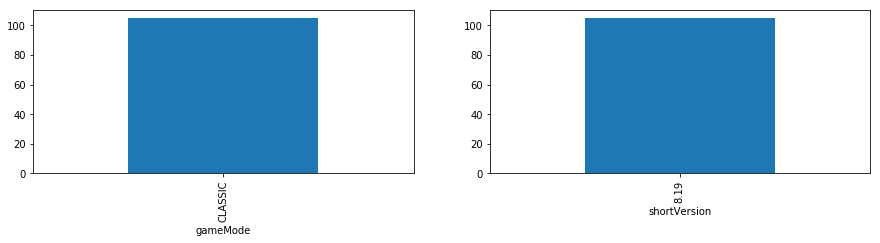

In [207]:
fig, axs = plt.subplots(1,2)
df.groupby(['gameMode'])['gameId'].nunique().plot(kind='bar', ax=axs[0])
df.sort_values(by='date').groupby(['shortVersion'])['gameId'].nunique().plot(kind='bar', ax=axs[1])

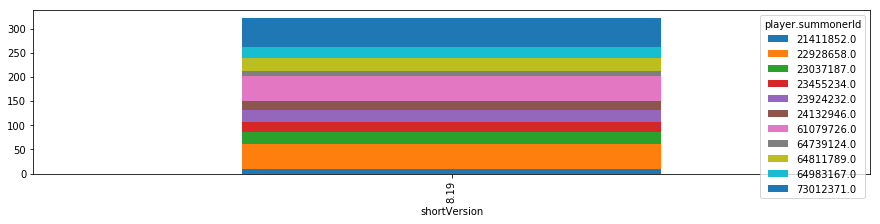

In [208]:
df.groupby(['shortVersion', 'player.summonerId'])['gameId'].nunique().unstack('player.summonerId').plot(kind='bar', stacked=True)

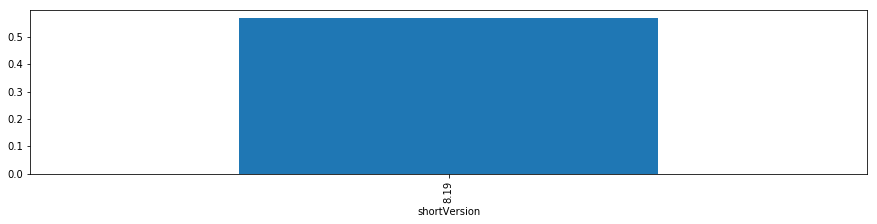

In [209]:
df.groupby(['shortVersion'])['win'].mean().plot(kind='bar')

In [210]:
def nameFromSummonerId(x):
    if x == 73012371.0:
        return 'jokokoloko'
    elif x == 61079726.0:
        return 'Skeevo'
    elif x == 22928658.0:
        return 'iKledYouNot'
    elif x == 64811789.0:
        return 'Channsanity'
    elif x == 64983167.0:
        return 'Rudo'
    elif x == 23037187.0:
        return 'Fláy'
    elif x == 23455234.0:
        return 'BokuWaHenry'
    elif x == 23924232.0:
        return 'Sheldor'
    elif x == 24132946.0:
        return 'DrArchadium'
    elif x == 21411852.0:
        return 'Onishfu'
    elif x == 64739124.0:
        return 'AgileOverlord'
    return 'unknown'

dfp = pd.merge(df, df, on='gameId')[['gameId', 'player.summonerId_x', 'player.summonerId_y', 'win_x']]
dfp['player.summonerName_x'] = dfp['player.summonerId_x'].apply(nameFromSummonerId)
dfp['player.summonerName_y'] = dfp['player.summonerId_y'].apply(nameFromSummonerId)
dfp.head()

,gameId,player.summonerId_x,player.summonerId_y,win_x,player.summonerName_x,player.summonerName_y
0,2884170615,61079726.0,61079726.0,1,Skeevo,Skeevo
1,2884170615,61079726.0,73012371.0,1,Skeevo,jokokoloko
2,2884170615,61079726.0,22928658.0,1,Skeevo,iKledYouNot
3,2884170615,73012371.0,61079726.0,1,jokokoloko,Skeevo
4,2884170615,73012371.0,73012371.0,1,jokokoloko,jokokoloko


In [211]:
temp = dfp.groupby(['player.summonerId_x']).nunique()
temp

,gameId,player.summonerId_x,player.summonerId_y,win_x,player.summonerName_x,player.summonerName_y
player.summonerId_x,,,,,,
21411852.0,10,1,7,2,1,7
22928658.0,52,1,11,2,1,11
23037187.0,25,1,11,2,1,11
23455234.0,20,1,9,2,1,9
23924232.0,24,1,11,2,1,11
24132946.0,19,1,10,2,1,10
61079726.0,52,1,11,2,1,11
64739124.0,11,1,8,2,1,8
64811789.0,27,1,10,2,1,10


In [214]:
win_rate_pivot_table = pd.pivot_table(dfp, values='win_x', index=['player.summonerName_x'], columns=['player.summonerName_y'], aggfunc=[np.mean])
win_rate_pivot_table

mean                                      \
player.summonerName_y AgileOverlord BokuWaHenry Channsanity DrArchadium   
player.summonerName_x                                                     
AgileOverlord              0.454545    0.333333    0.400000         NaN   
BokuWaHenry                0.333333    0.300000    0.500000    1.000000   
Channsanity                0.400000    0.500000    0.629630    0.000000   
DrArchadium                     NaN    1.000000    0.000000    0.473684   
Fláy                       0.666667    1.000000    0.692308    0.333333   
Onishfu                         NaN         NaN         NaN    0.500000   
Rudo                            NaN         NaN    0.000000    0.400000   
Sheldor                    0.500000    0.250000    0.833333    0.500000   
Skeevo                     0.400000    0.363636    0.750000    0.700000   
iKledYouNot                0.571429    0.428571    0.812500    0.600000   
jokokoloko                 0.333333    0.333333    0.684211    0.500000   

                                                                       \
player.summonerName_y      Fláy Onishfu      Rudo   Sheldor    Skeevo   
player.summonerName_x                                                   
AgileOverlord          0.666667     NaN       NaN  0.500000  0.400000   
BokuWaHenry            1.000000     NaN       NaN  0.250000  0.363636   
Channsanity            0.692308     NaN  0.000000  0.833333  0.750000   
DrArchadium            0.333333     0.5  0.400000  0.500000  0.700000   
Fláy                   0.640000     0.0  0.400000  0.500000  0.750000   
Onishfu                0.000000     0.7       NaN  0.600000  0.600000   
Rudo                   0.400000     NaN  0.565217  0.000000  0.500000   
Sheldor                0.500000     0.6  0.000000  0.458333  0.523810   
Skeevo                 0.750000     0.6  0.500000  0.523810  0.596154   
iKledYouNot            0.800000     0.0  0.833333  0.500000  0.718750   
jokokoloko             0.666667     0.5  0.600000  0.409091  0.613636   

                                              
player.summonerName_y iKledYouNot jokokoloko  
player.summonerName_x                         
AgileOverlord            0.571429   0.333333  
BokuWaHenry              0.428571   0.333333  
Channsanity              0.812500   0.684211  
DrArchadium              0.600000   0.500000  
Fláy                     0.800000   0.666667  
Onishfu                  0.000000   0.500000  
Rudo                     0.833333   0.600000  
Sheldor                  0.500000   0.409091  
Skeevo                   0.718750   0.613636  
iKledYouNot              0.653846   0.675000  
jokokoloko               0.675000   0.576271

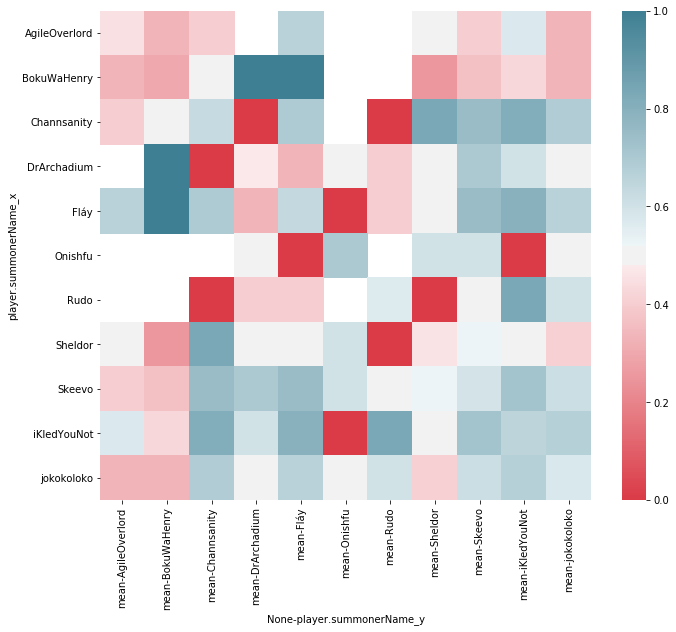

In [215]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(win_rate_pivot_table, cmap=cmap)